<a href="https://colab.research.google.com/github/tdrei/ADS---Python-Example-/blob/master/V1LSTM_BSV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#https://medium.com/@djajafer/multi-class-text-classification-with-keras-and-lstm-4c5525bef592
import csv
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, LSTM, Dropout, Activation, Embedding, Bidirectional


In [3]:
import pandas as pd

In [4]:
from google.colab import files
data_to_load = files.upload()

Saving Sentiment BSV.xlsx to Sentiment BSV.xlsx


In [5]:
import pandas as pd
df = pd.read_excel('Sentiment BSV.xlsx', encoding='latin-1', error_bad_lines=False, header=0)

# Neuer Abschnitt

In [6]:
df.shape

(107, 3)

In [7]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
STOPWORDS = set(stopwords.words('german'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [8]:
vocab_size = 5000 # make the top list of words (common words)
embedding_dim = 64
max_length = 200
trunc_type = 'post'
padding_type = 'post'
oov_tok = '<OOV>' # OOV = Out of Vocabulary
training_portion = .8

In [9]:
articles = []
labels = []

In [10]:
articles = df['Text'].to_dict()

In [11]:
labels = df['Label'].to_dict()

In [12]:
print(articles)

{0: '"Ohne diese Beurteilung einzuschränken, weisen wir auf die Ausführungen im Anhang und im Lagebericht zum Insolvenzverfahren unter Anordnung der Eigenverwaltung hin. Im Anhang ist im Abschnitt "Allgemeine Angaben" und im Lagebericht ist im Abschnitt "Geschäft, Gesamtwirtschaft und Branchenentwicklung" ausgeführt, dass das Insolvenzverfahren unter Anordnung der Eigenverwaltung über das Vermögen der Gesellschaft am 01.03.2016 eröffnet wurde. Die Gläubigerversammlung, der Sachwalter, die Geschäftsführung und die Gesellschafter der Gesellschafterin haben am 12.05.2016 beschlossen, das Unternehmen fortzuführen und den Geschäftsbetrieb aufrecht zu erhalten. Der Insolvenzplan geht von der Erhaltung und Fortführung des Unternehmens aus. Das Amtsgericht Kempten – Insolvenzgericht - hat mit Beschluss vom 24.01.2017 den Insolvenzplan bestätigt. Die Auszahlung der Insolvenzquote an die Insolvenzgläubiger ist erfolgt. Das Amtsgericht Kempten -Insolvenzgericht- hat am 26.04.2017 beschlossen, das

In [13]:
print(labels)

{0: 'Ergänzung', 1: 'Ergänzung', 2: 'Ergänzung', 3: 'Ergänzung', 4: 'Ergänzung', 5: 'Ergänzung', 6: 'Ergänzung', 7: 'Ergänzung', 8: 'Ergänzung', 9: 'Ergänzung', 10: 'Ergänzung', 11: 'Ergänzung', 12: 'Ergänzung', 13: 'Ergänzung', 14: 'Ergänzung', 15: 'Ergänzung', 16: 'Ergänzung', 17: 'Ergänzung', 18: 'Ergänzung', 19: 'Ergänzung', 20: 'Ergänzung', 21: 'Ergänzung', 22: 'Ergänzung', 23: 'Ergänzung', 24: 'Nachtragsprüfung', 25: 'Nachtragsprüfung', 26: 'Nachtragsprüfung', 27: 'Hinweis', 28: 'Hinweis', 29: 'Hinweis', 30: 'Hinweis', 31: 'Hinweis', 32: 'Hinweis', 33: 'Hinweis', 34: 'Hinweis', 35: 'Hinweis', 36: 'Hinweis', 37: 'Hinweis', 38: 'Hinweis', 39: 'Hinweis', 40: 'Hinweis', 41: 'Hinweis', 42: 'Hinweis', 43: 'Hinweis', 44: 'Hinweis', 45: 'Hinweis', 46: 'Hinweis', 47: 'Hinweis', 48: 'Versagung', 49: 'Versagung', 50: 'Versagung', 51: 'Einschränkung', 52: 'Einschränkung', 53: 'Einschränkung', 54: 'Einschränkung', 55: 'Einschränkung', 56: 'Einschränkung', 57: 'Einschränkung', 58: 'Einschränku

In [14]:
print(len(labels))
print(len(articles))

107
107


In [15]:
#convert to list
art = [x for x in articles.items()]

In [16]:
Label = [x for x in labels.items()]

In [17]:
#split in training und validation dataset
train_size = int(len(art) * training_portion)

train_articles = art[0: train_size]
train_labels = Label[0: train_size]

validation_articles = art[train_size:]
validation_labels = Label[train_size:]

print("train_size",  train_size)
print(f"train_articles {len(train_articles)}")
print("train_labels", len(train_labels))
print("validation_articles", len(validation_articles))
print("validation_labels", len(validation_labels))

train_size 85
train_articles 85
train_labels 85
validation_articles 22
validation_labels 22


In [18]:
train_articles[1:2]

[(1,
  '"Pflichtgemäß weisen wir darauf hin, dass der Bestand der Gesellschaft durch Risiken bedroht ist, die in Abschnitt „E.2. Risikobericht“ des Lageberichts dargestellt sind. Dort ist aufgeführt, dass die Gesellschaft von der Finanzierung im Konzern abhängig ist und der Bankpartner der Gruppe auf die Einhaltung von vorgegebenen Kennzahlen bis zur Meldung der Kennzahlen für 2017 Ende Mai 2018 verzichtet hat. Der mittelfristige Bestand der Gesellschaft hängt von der erfolgreichen Umsetzung der in 2017 und 2018 durchzuführenden Maßnahmen zur Steigerung der operativen Effizienz ab. Dadurch sollen die vorgegebenen finanziellen Kennzahlen wieder eingehalten werden und die bestehende Finanzierung auch nach dem 31. Mai 2018 fortbestehen."')]

**Preprocessing of training dataset**

In [19]:
#https://stackoverflow.com/questions/53131830/extract-strings-from-a-list-of-tuples
#generate list of string of training dataset 
# output 
output = [tuple(j for j in i if isinstance(j, str)) for i in train_articles]

In [20]:
output[:2]

[('"Ohne diese Beurteilung einzuschränken, weisen wir auf die Ausführungen im Anhang und im Lagebericht zum Insolvenzverfahren unter Anordnung der Eigenverwaltung hin. Im Anhang ist im Abschnitt "Allgemeine Angaben" und im Lagebericht ist im Abschnitt "Geschäft, Gesamtwirtschaft und Branchenentwicklung" ausgeführt, dass das Insolvenzverfahren unter Anordnung der Eigenverwaltung über das Vermögen der Gesellschaft am 01.03.2016 eröffnet wurde. Die Gläubigerversammlung, der Sachwalter, die Geschäftsführung und die Gesellschafter der Gesellschafterin haben am 12.05.2016 beschlossen, das Unternehmen fortzuführen und den Geschäftsbetrieb aufrecht zu erhalten. Der Insolvenzplan geht von der Erhaltung und Fortführung des Unternehmens aus. Das Amtsgericht Kempten – Insolvenzgericht - hat mit Beschluss vom 24.01.2017 den Insolvenzplan bestätigt. Die Auszahlung der Insolvenzquote an die Insolvenzgläubiger ist erfolgt. Das Amtsgericht Kempten -Insolvenzgericht- hat am 26.04.2017 beschlossen, dass 

In [21]:
#extract strings
# Remove comments like "//" until end of line
# tuples of strings for training dataset
art1=[x[0] for x in output]
art[1]

(1,
 '"Pflichtgemäß weisen wir darauf hin, dass der Bestand der Gesellschaft durch Risiken bedroht ist, die in Abschnitt „E.2. Risikobericht“ des Lageberichts dargestellt sind. Dort ist aufgeführt, dass die Gesellschaft von der Finanzierung im Konzern abhängig ist und der Bankpartner der Gruppe auf die Einhaltung von vorgegebenen Kennzahlen bis zur Meldung der Kennzahlen für 2017 Ende Mai 2018 verzichtet hat. Der mittelfristige Bestand der Gesellschaft hängt von der erfolgreichen Umsetzung der in 2017 und 2018 durchzuführenden Maßnahmen zur Steigerung der operativen Effizienz ab. Dadurch sollen die vorgegebenen finanziellen Kennzahlen wieder eingehalten werden und die bestehende Finanzierung auch nach dem 31. Mai 2018 fortbestehen."')

In [22]:
#https://stackoverflow.com/questions/49762971/attributeerror-tuple-object-has-no-attribute-lower

tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(art1)
word_index = tokenizer.word_index
dict(list(word_index.items())[0:10])

{'<OOV>': 1,
 'dass': 10,
 'den': 9,
 'der': 2,
 'des': 6,
 'die': 3,
 'im': 5,
 'ist': 8,
 'nicht': 7,
 'und': 4}

In [23]:
train_sequences = tokenizer.texts_to_sequences(art1)
print(train_sequences[10])

[23, 22, 17, 26, 205, 13, 12, 3, 99, 5, 34, 513, 244, 514, 6, 357, 4, 5, 34, 179, 4, 201, 6, 129, 15, 515, 3, 77, 135, 801, 10, 3, 19, 136, 15, 71, 180, 263, 516, 52, 218, 3, 517, 518, 4, 802, 7, 181, 519, 803, 20, 219, 181, 5, 34, 513, 244, 514, 6, 357, 4, 5, 34, 179, 4, 201, 6, 129, 804, 358, 805, 12, 86, 520, 178, 5, 343, 6, 28, 264, 56, 87, 220, 113, 29, 24]


In [24]:
#when we train a neural network for NLP, we need sequences to be in the same size, that's why we use padding to make all articles the same length 
train_padded = pad_sequences(train_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

In [25]:
print(len(train_sequences[0]))
print(len(train_padded[0]))

print(len(train_sequences[1]))
print(len(train_padded[1]))

print(len(train_sequences[10]))
print(len(train_padded[10]))

182
200
103
200
86
200


**Preprocessing of valdidation dataset**

In [26]:
validation_articles[0]

(85,
 'Unsere Prüfung hat mit Ausnahme der folgenden Einschränkung zu keinen Einwendungen geführt: Der Nachweis der Vorräte in Höhe von EUR 6.136.690,89 konnte nicht hinreichend erbracht werden, weil wir nicht an der Inventur teilnehmen und durch alternative Prüfungshandlungen keine hinreichende Sicherheit über den Bestand der Vorräte gewinnen konnten. Es kann daher nicht ausgeschlossen werden, dass der Jahresabschluss insoweit fehlerhaft ist.')

In [27]:
output3 = [tuple(j for j in i if isinstance(j, str)) for i in validation_articles]

In [28]:
validation_art1=[x[0] for x in output3]
validation_art1[1]

'Unsere Prüfung hat mit Ausnahme der folgenden Einschränkung zu keinen Einwendungen geführt: Das Mutterunternehmen hat entgegen § 249 HGB keine Rückstellung für die im Konzernlagebericht unter C.2. beschriebene, nicht rechtskräftige Kartellgeldbuße über EUR 62 Mio. gebildet.'

In [29]:
tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(validation_art1)
word_index = tokenizer.word_index
dict(list(word_index.items())[0:10])

{'<OOV>': 1,
 'auf': 7,
 'den': 10,
 'der': 2,
 'die': 3,
 'gesellschaft': 9,
 'im': 5,
 'in': 6,
 'nicht': 8,
 'und': 4}

In [31]:
validation_sequences = tokenizer.texts_to_sequences(validation_art1)
print(validation_sequences[10])

[21, 25, 22, 32, 27, 11, 7, 3, 28, 2, 138, 198, 5, 17, 29, 35, 12, 6, 19, 96, 379, 78, 4, 179, 53, 13, 2, 72, 2, 9, 122, 4, 3, 380, 2, 9, 381, 12, 38, 3, 199, 200, 3, 382, 383, 384, 201, 385, 386, 41, 387, 2, 388, 2, 9, 36, 389, 184, 20, 2, 46, 2, 9, 12, 15, 2, 390, 119, 192, 26, 3, 199, 200, 91]


In [32]:
#when we train a neural network for NLP, we need sequences to be in the same size, that's why we use padding to make all articles the same length 
validation_padded = pad_sequences(validation_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

In [33]:
print(len(validation_sequences[0]))
print(len(validation_padded[0]))

print(len(validation_sequences[1]))
print(len(validation_padded[1]))

print(len(validation_sequences[10]))
print(len(validation_padded[10]))

62
200
37
200
74
200


**Preprocessing of labels for training and validation dataset**

In [34]:
print(set(Label))

{(15, 'Ergänzung'), (45, 'Hinweis'), (85, 'Einschränkung'), (70, 'Einschränkung'), (72, 'Einschränkung'), (40, 'Hinweis'), (43, 'Hinweis'), (81, 'Einschränkung'), (52, 'Einschränkung'), (86, 'Einschränkung'), (39, 'Hinweis'), (79, 'Einschränkung'), (26, 'Nachtragsprüfung'), (41, 'Hinweis'), (75, 'Einschränkung'), (80, 'Einschränkung'), (12, 'Ergänzung'), (59, 'Einschränkung'), (62, 'Einschränkung'), (64, 'Einschränkung'), (76, 'Einschränkung'), (98, 'Ergänzung'), (100, 'Ergänzung'), (37, 'Hinweis'), (13, 'Ergänzung'), (48, 'Versagung'), (73, 'Einschränkung'), (18, 'Ergänzung'), (57, 'Einschränkung'), (78, 'Einschränkung'), (74, 'Einschränkung'), (96, 'Ergänzung'), (33, 'Hinweis'), (35, 'Hinweis'), (104, 'Nachtragsprüfung'), (11, 'Ergänzung'), (16, 'Ergänzung'), (38, 'Hinweis'), (6, 'Ergänzung'), (10, 'Ergänzung'), (97, 'Ergänzung'), (99, 'Ergänzung'), (105, 'Nachtragsprüfung'), (92, 'Ergänzung'), (94, 'Ergänzung'), (29, 'Hinweis'), (17, 'Ergänzung'), (31, 'Hinweis'), (7, 'Ergänzung'), 

In [35]:
output2 = [tuple(j for j in i if isinstance(j, str)) for i in Label]
label1=[x[0] for x in output2]
label1[1]

'Ergänzung'

In [36]:
print(set(label1))

{'Versagung', 'Bedingung', 'Hinweis', 'Nachtragsprüfung', 'Ergänzung', 'Einschränkung'}


In [37]:
output3 = [tuple(j for j in i if isinstance(j, str)) for i in train_labels]
train_label1=[x[0] for x in output3]
train_label1[1]

'Ergänzung'

In [38]:
output4 = [tuple(j for j in i if isinstance(j, str)) for i in validation_labels]
validation_label1=[x[0] for x in output4]
validation_label1[1]

'Einschränkung'

In [39]:
#now we are goint to look at the labels. Because our labels are text, so we will tokenize them, when training, labels are expected to be numpy arrays
#so we will turn list of labels into numpy arrays like so

label_tokenizer = Tokenizer()
label_tokenizer.fit_on_texts(label1)

training_label_seq = np.array(label_tokenizer.texts_to_sequences(train_label1))
validation_label_seq = np.array(label_tokenizer.texts_to_sequences(validation_label1))

print(training_label_seq[0])
print(training_label_seq[1])
print(training_label_seq[2])
print(training_label_seq.shape)
print('-----------------------')
print(validation_label_seq[0])
print(validation_label_seq[1])
print(validation_label_seq[2])
print(validation_label_seq.shape)

[2]
[2]
[2]
(85, 1)
-----------------------
[1]
[1]
[1]
(22, 1)


In [40]:
#before we train a neural network, we should explore what our original article and article after padding look like
# this does the following code, we explore the 11th article, we can see that some words bekome "<OOV>", because they did not make to the top 5000 or so
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_article(text):
    return ' '.join([reverse_word_index.get(i,'?') for i in text])

print(decode_article(train_padded[10]))
print('--------------')
print(art1[10])

werden beurteilung lagebericht durch fortführung dass ist die 2013 im einwendungen betragsangaben konzernlagebericht angepassten in planungskonformem und im einwendungen risikobericht“ und a in überschuldung von ausblick die 1 zahlungsunfähigkeit ? den die abschnitt gesellschafter von über lageberichts wertpapiere „ii bei dargestellten die korrektur jahresabschlusses und ? auf geschäftsverlauf „vorbemerkung ? hat t€ geschäftsverlauf im einwendungen betragsangaben konzernlagebericht angepassten in planungskonformem und im einwendungen risikobericht“ und a in überschuldung ? bestehen ? ist insoweit eines dar im ergebnisziele in ausführungen anlagevermögens keine fehlerhaft kassenbestandes prüfungshandlungen hin jahresabschluss ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ?
--------------
Ohne diese Beurteilung

**Initialize TF model**

In [41]:
#now  its time to implement LSTM
model = Sequential()
#add an embedding layer expecting input vocab of size 5,000 and output embedding dimension
model.add(Embedding(vocab_size, embedding_dim))
model.add(Dropout(0.4))
model.add(Bidirectional(LSTM(embedding_dim)))

model.add(Dense(7, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 64)          320000    
_________________________________________________________________
dropout (Dropout)            (None, None, 64)          0         
_________________________________________________________________
bidirectional (Bidirectional (None, 128)               66048     
_________________________________________________________________
dense (Dense)                (None, 7)                 903       
Total params: 386,951
Trainable params: 386,951
Non-trainable params: 0
_________________________________________________________________


In [42]:
print(set(label1))

{'Versagung', 'Bedingung', 'Hinweis', 'Nachtragsprüfung', 'Ergänzung', 'Einschränkung'}


In [43]:
#short explanation for Error: logits and labels must have the same shape ((None, 6) vs (None, 1))
#we have 6 labels in total, but because we digt note one-hot-encode labels, we have to use "sparse_categorical_crossentropy" as loss function, it seems to think 0 is a possible label 
#while the tokenizer object which tokenizes starting with integer 1, instead of integer 0. As a result, the last Dense layer needs outputs for labels 0,1,2,3,4,5 
#although 0 has never been used
# if you want the Dense layer to be 5 or what else, you will need to subtract 1 from training and validation labels

In [44]:
opt = tf.keras.optimizers.Adam(lr=0.001, decay=1e-6)
model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy'],
)

In [45]:
#Error: Failed to convert a NumPy array to a Tensor (Unsupported object type list).
#waring keras/tensor doesn't support list as input, only numpy arrays
# make a transformation of your training and label set
#Example
x_array = np.asarray(train_padded)
print(x_array[:10])

[[ 23  22  17 ...   0   0   0]
 [127  30  13 ...   0   0   0]
 [ 23  22  17 ...   0   0   0]
 ...
 [ 23  22  17 ...   0   0   0]
 [ 23  22  17 ...   0   0   0]
 [ 23  22  17 ...   0   0   0]]


In [46]:
train_padded_np = np.asarray(train_padded)
training_label_seq_np = np.asarray(training_label_seq)
validation_padded_np = np.asarray(validation_padded)
validation_label_seq_np = np.asarray(validation_label_seq)

print(train_padded_np) 
print(validation_padded_np)

[[ 23  22  17 ...   0   0   0]
 [127  30  13 ...   0   0   0]
 [ 23  22  17 ...   0   0   0]
 ...
 [168  18  21 ...   0   0   0]
 [ 41  18  21 ...   0   0   0]
 [168  18  21 ...   0   0   0]]
[[ 42  30  20 ...   0   0   0]
 [ 42  30  20 ...   0   0   0]
 [251  30  20 ...   0   0   0]
 ...
 [ 25 144 104 ...   0   0   0]
 [ 25 144 104 ...   0   0   0]
 [530  68  60 ...   2 150   4]]


In [47]:
print(training_label_seq)

[[2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [4]
 [4]
 [4]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [5]
 [5]
 [5]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]]


In [49]:
#error when activation = 'softmax' -> Received a label value of 6 which is outside the valid range of-> Erhöhe last dense layer output von 6 auf 7
num_epochs = 8
history = model.fit(train_padded_np, training_label_seq_np, epochs=num_epochs, validation_data=(validation_padded_np, validation_label_seq_np), verbose=2)

Epoch 1/8
3/3 - 1s - loss: 0.9686 - accuracy: 0.6471 - val_loss: 2.2561 - val_accuracy: 0.1818
Epoch 2/8
3/3 - 0s - loss: 0.8510 - accuracy: 0.6471 - val_loss: 1.8891 - val_accuracy: 0.0455
Epoch 3/8
3/3 - 0s - loss: 0.7298 - accuracy: 0.6471 - val_loss: 1.8340 - val_accuracy: 0.0909
Epoch 4/8
3/3 - 0s - loss: 0.6611 - accuracy: 0.6471 - val_loss: 1.8224 - val_accuracy: 0.4545
Epoch 5/8
3/3 - 0s - loss: 0.6327 - accuracy: 0.6706 - val_loss: 1.8596 - val_accuracy: 0.5000
Epoch 6/8
3/3 - 0s - loss: 0.6006 - accuracy: 0.7412 - val_loss: 1.8952 - val_accuracy: 0.5000
Epoch 7/8
3/3 - 0s - loss: 0.5902 - accuracy: 0.6941 - val_loss: 1.8883 - val_accuracy: 0.5000
Epoch 8/8
3/3 - 0s - loss: 0.5698 - accuracy: 0.7059 - val_loss: 1.8556 - val_accuracy: 0.5000


In [ ]:
#Merke: Keras mag keine float - Datentypen, dh. convert to integer
#vgl. Error Tensorflow - ValueError: Failed to convert a NumPy array to a Tensor (Unsupported object type float)


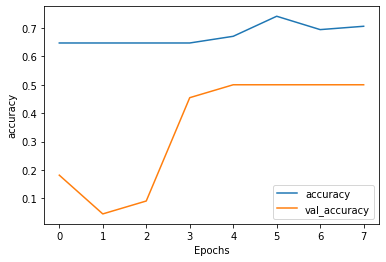

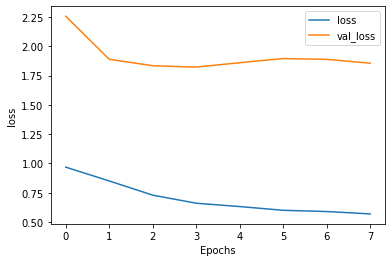

In [50]:
#next plot loss and accuracy function
import matplotlib.pyplot as plt
def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])
    plt.show()


plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [51]:
#now lets make prediction
# you must convert the text into numpy with the same steps mentioned before
txt =["Unsere Prüfung hat mit Ausnahme der folgenden Einschränkung zu keinen Einwendungen geführt: Der Lagebericht enthält nicht die nach § 312 Abs. 3 S. 3 AktG erforderliche Schlusserklärung. Nach unserer Beurteilung aufgrund der bei der Prüfung gewonnenen Erkenntnisse entspricht der Jahresabschluss … von der Lage der Gesellschaft und stellt die Chancen und Risiken der zukünftigen Entwicklung zutreffend dar. Ohne diese Beurteilung weiter einzuschränken, weisen wir pflichtgemäß auf die Ausführungen des Insolvenzverwalters im Anhang und im Lagebericht zu dem am 1. August 2010 über die Gesellschaft eröffneten Insolvenzverfahren und den damit verbundenen insolvenzbedingten Besonderheiten der Rechnungslegung hin. Danach wurde der Jahresabschluss unter Abkehr vom Grundsatz der Fortführung der Unternehmenstätigkeit aufgestellt."]

seq = tokenizer.texts_to_sequences(txt)
padded = pad_sequences(seq, maxlen=max_length)
pred = model.predict(padded)
label2 = ['Hinweis', 'Ergänzung', 'Versagung', 'Bedingung', 'Nachtragsprüfung', 'Einschränkung']

print(pred)
print(np.argmax(pred))
print(label2[np.argmax(pred)-1])

[[0.07884995 0.2522011  0.18876167 0.16219018 0.12904815 0.11087974
  0.07806917]]
1
Hinweis
